In [14]:
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn as nn
import torch
import math
%matplotlib inline

In [17]:
# 使用pytorch版本的教程中提供的范例
# http://nlp.seas.harvard.edu/2018/04/03/attention.html
class PositionalEncoding(nn.Module):
  "Implement the PE function."
  def __init__(self, d_model, dropout, max_len=5000):
    super(PositionalEncoding, self).__init__()
    self.dropout = nn.Dropout(p=dropout)

    # Compute the positional encodings once in log space.
    pe = torch.zeros(max_len, d_model)
    position = torch.arange(0., max_len).unsqueeze(1)
    div_term = torch.exp(torch.arange(0., d_model, 2) * -(math.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    pe = pe.unsqueeze(0)
    self.register_buffer('pe', pe)

  def forward(self, x):
    x = x + Variable(self.pe[:, :x.size(1)], requires_grad=False)
    return self.dropout(x)

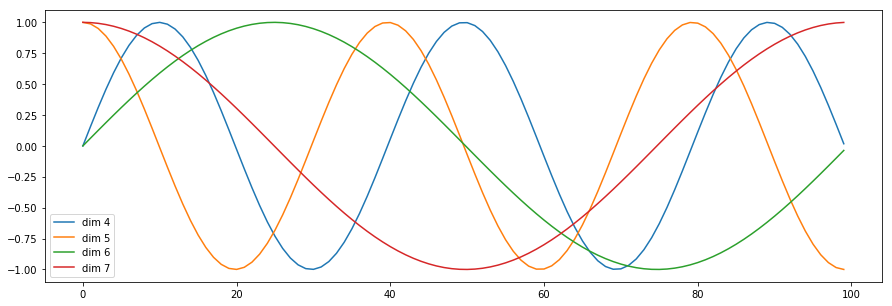

In [18]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
y = pe.forward(Variable(torch.zeros(1, 100, 20)))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d"%p for p in [4,5,6,7]])
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('pe.eps', format='eps', dpi=1000)